In [7]:
import pandas as pd

# data link https://rp5.ru/Weather_archive_in_Sofia_(weather_station)
path = "data/sofia_airport_utf.csv"
df = pd.read_csv(path)


#### we start with 24000 rows

In [8]:
df.shape

(23700, 29)

In [9]:
df.dropna().shape

(0, 29)

In [10]:

# print nulls
df.isnull().sum()


Local time in Sofia (weather station)        0
T                                            1
Po                                           1
P                                            1
Pa                                        5956
U                                            3
DD                                           1
Ff                                           1
ff10                                     23700
ff3                                      23539
N                                            0
WW                                           0
W1                                       16945
W2                                       16945
Tn                                          76
Tx                                          34
Cl                                        3298
Nh                                        3288
H                                         3294
Cm                                        5222
Ch                                        6432
VV           

In [11]:

null_cols = ["ff10", "ff3", "W1", "W2", "E", "Tg", "E'", "sss"]

# df without the massive removed cols
df_nan_cleanse = df.drop(null_cols, axis=1)

#### We drop about 70% of data if we don't remove other cols or fill 

In [12]:
print(df_nan_cleanse.dropna().shape)

(6547, 21)


#### We should remove other cols

In [13]:
# print nulls
df_nan_cleanse.isnull().sum()

Local time in Sofia (weather station)        0
T                                            1
Po                                           1
P                                            1
Pa                                        5956
U                                            3
DD                                           1
Ff                                           1
N                                            0
WW                                           0
Tn                                          76
Tx                                          34
Cl                                        3298
Nh                                        3288
H                                         3294
Cm                                        5222
Ch                                        6432
VV                                           7
Td                                           1
RRR                                      11871
tR                                       11871
dtype: int64

#### Removing percipitation data:
    - Would return it if percipitation data is needed
    

In [14]:
percipitation_cols = ["RRR", "tR"]
df_percip_cleanse = df_nan_cleanse.drop(percipitation_cols, axis=1)

#### We are up to only about 40% data loss from missing data:

In [15]:
print(df_percip_cleanse.dropna().shape)

(13154, 19)


In [16]:
df_percip_cleanse.isnull().sum()

Local time in Sofia (weather station)       0
T                                           1
Po                                          1
P                                           1
Pa                                       5956
U                                           3
DD                                          1
Ff                                          1
N                                           0
WW                                          0
Tn                                         76
Tx                                         34
Cl                                       3298
Nh                                       3288
H                                        3294
Cm                                       5222
Ch                                       6432
VV                                          7
Td                                          1
dtype: int64

T - 1 missing, temperature
    - Could be usefull

Po - Athmospheric pressure
    - Could be usefull
    - onle 1 missing row

P - Athmospheric pressure on sea level
    - only 1 col missing
    - could be usefull
    
Pa  - Athmosperic tendency
    - (sounds predictive)
    - 5956 colls missing
U - Percentage humidity at 2m above ground
    - 3 missing
    - looks correlated


DD - Wind direction
    - ESSENTIAL !!
    - 1 missing

Ff - Average wind speed
    - 1 missing
    - Could use it as a TARGET variable

N - Could Status
    - 0 missing 

WW - Present weather
    - 0 missing


Tn - Min temperature during past period
    - Could be usefull
    -76 missing


Tx - Max temperature during past period
    - Could be usefull
    - 34 missing

Cl - Clouds feature
    - 3298 missing
    - Could be removed

Nh - Amount of Cl present
    - COuld be Correlated with Cl 
    - 3288 missing rows

H - height of the base of the lowes clouds
    - 3294 missing
    - could be removed
    
Cm - Clouds in some outer layer
    - 5222 missing
    - A lot of data missing but correlation has to be checked

Ch- Clouds in some outer layer
    - 6432 missing
    - A lot of data missing but correlation has to be checked

VV- Horizontal visibility
    - random variable
    - 7 missing

Td - Dew point temperature
    - has to be investigated
    - 1 missing
    - could be random but we can still keep it

In [17]:
df_correlation_testing = df_percip_cleanse.dropna()
df_correlation_testing.shape

(13154, 19)

In [18]:
df_correlation_testing.head()

Local time in Sofia (weather station)     T     Po      P   Pa     U  \
2                      04.03.2019 17:00  15.2  706.9  758.1 -1.7  29.0   
3                      04.03.2019 14:00  13.9  708.6  760.1 -2.2  31.0   
5                      04.03.2019 08:00  -1.4  710.5  765.1  0.0  96.0   
7                      04.03.2019 02:00   0.0  710.8  765.2 -0.3  77.0   
8                      03.03.2019 23:00   6.0  711.1  764.2  0.9  54.0   

                           DD   Ff        N WW   Tn    Tx  \
2               Calm, no wind  0.0  20–30%.    -1.4  15.8   
3               Calm, no wind  0.0  20–30%.    -1.4  14.1   
5               Calm, no wind  0.0     40%.    -1.8   7.0   
7  Wind blowing from the east  1.0  20–30%.    -0.2   7.0   
8  Wind blowing from the west  1.0     60%.     5.4   7.0   

                                                  Cl                       Nh  \
2  Cumulus humilis or Cumulus fractus other than ...  10%  or less, but not 0   
3  No Stratocumulus, Stratus, Cumulus or Cumuloni...                no clouds   
5  No Stratocumulus, Stratus, Cumulus or Cumuloni...                no clouds   
7                       Stratocumulus cumulogenitus.                  20–30%.   
8                       Stratocumulus cumulogenitus.                     60%.   

                             H                                            Cm  \
2                    1000-1500  No Altocumulus, Altostratus or Nimbostratus.   
3  2500 or more, or no clouds.  No Altocumulus, Altostratus or Nimbostratus.   
5  2500 or more, or no clouds.  No Altocumulus, Altostratus or Nimbostratus.   
7                    1000-1500  No Altocumulus, Altostratus or Nimbostratus.   
8                    1000-1500  No Altocumulus, Altostratus or Nimbostratus.   

                                                  Ch    VV   Td  
2  Cirrus fibratus, sometimes uncinus, not progre...  25.0 -2.7  
3  Cirrus fibratus, sometimes uncinus, not progre...  20.0 -3.2  
5  Cirrus fibratus, sometimes uncinus, not progre...  20.0 -2.0  
7           No Cirrus, Cirrocumulus or Cirrostratus.  15.0 -3.6  
8           No Cirrus, Cirrocumulus or Cirrostratus.  15.0 -2.6

#### OK, we are removing WW

In [19]:
df_correlation_testing["Ff"]

2        0.0
3        0.0
5        0.0
7        1.0
8        1.0
9        1.0
10       2.0
11       1.0
14       1.0
15       2.0
16       0.0
17       2.0
18       5.0
19       4.0
20       4.0
21       2.0
22       0.0
23       0.0
25       0.0
26       2.0
27       3.0
28       4.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       2.0
35       2.0
36       5.0
        ... 
18149    0.0
18151    0.0
18153    1.0
18155    2.0
18156    2.0
18159    2.0
18161    1.0
18163    1.0
18165    0.0
18169    0.0
18171    0.0
18173    0.0
18175    0.0
18177    0.0
18179    0.0
18189    0.0
18191    0.0
18193    0.0
18195    0.0
18197    0.0
18199    0.0
18201    0.0
18203    0.0
18205    0.0
18213    0.0
18215    1.0
18217    4.0
18229    0.0
18230    0.0
18233    0.0
Name: Ff, Length: 13154, dtype: float64

In [20]:
df_correlation_testing["WW"]

2                                                         
3                                                         
5                                                         
7                                                         
8                                                         
9                                                         
10                                                        
11                                     Shower(s) of rain. 
14                                                        
15                                                        
16                                                        
17                                                        
18                                                        
19                                                        
20                                                        
21                                                        
22                                                      

#### Removing the WW col

In [21]:
df_correlation_testing = df_correlation_testing.drop(["WW"], axis=1)

#### Lets check the correlation

In [22]:
df_correlation_testing.corr()

T        Po         P        Pa         U        Ff        Tn  \
T   1.000000 -0.161718 -0.469029 -0.185821 -0.615809  0.075599  0.920337   
Po -0.161718  1.000000  0.947205  0.089536  0.021641 -0.100593 -0.190935   
P  -0.469029  0.947205  1.000000  0.135672  0.209790 -0.111262 -0.472867   
Pa -0.185821  0.089536  0.135672  1.000000  0.281698  0.053138 -0.016878   
U  -0.615809  0.021641  0.209790  0.281698  1.000000 -0.286663 -0.369586   
Ff  0.075599 -0.100593 -0.111262  0.053138 -0.286663  1.000000  0.049844   
Tn  0.920337 -0.190935 -0.472867 -0.016878 -0.369586  0.049844  1.000000   
Tx  0.961283 -0.162309 -0.458544 -0.112117 -0.510995  0.023738  0.929257   
VV  0.500072 -0.007893 -0.164479 -0.135082 -0.632805  0.092462  0.375785   
Td  0.841716 -0.187446 -0.447966 -0.018436 -0.106297 -0.085837  0.914384   

          Tx        VV        Td  
T   0.961283  0.500072  0.841716  
Po -0.162309 -0.007893 -0.187446  
P  -0.458544 -0.164479 -0.447966  
Pa -0.112117 -0.135082 -0.018436  
U  -0.510995 -0.632805 -0.106297  
Ff  0.023738  0.092462 -0.085837  
Tn  0.929257  0.375785  0.914384  
Tx  1.000000  0.506562  0.864925  
VV  0.506562  1.000000  0.203680  
Td  0.864925  0.203680  1.000000

#### First we have to numerize the string cols
    - correlation coeficient are very low tho

In [23]:
df_correlation_testing.head()

Local time in Sofia (weather station)     T     Po      P   Pa     U  \
2                      04.03.2019 17:00  15.2  706.9  758.1 -1.7  29.0   
3                      04.03.2019 14:00  13.9  708.6  760.1 -2.2  31.0   
5                      04.03.2019 08:00  -1.4  710.5  765.1  0.0  96.0   
7                      04.03.2019 02:00   0.0  710.8  765.2 -0.3  77.0   
8                      03.03.2019 23:00   6.0  711.1  764.2  0.9  54.0   

                           DD   Ff        N   Tn    Tx  \
2               Calm, no wind  0.0  20–30%. -1.4  15.8   
3               Calm, no wind  0.0  20–30%. -1.4  14.1   
5               Calm, no wind  0.0     40%. -1.8   7.0   
7  Wind blowing from the east  1.0  20–30%. -0.2   7.0   
8  Wind blowing from the west  1.0     60%.  5.4   7.0   

                                                  Cl                       Nh  \
2  Cumulus humilis or Cumulus fractus other than ...  10%  or less, but not 0   
3  No Stratocumulus, Stratus, Cumulus or Cumuloni...                no clouds   
5  No Stratocumulus, Stratus, Cumulus or Cumuloni...                no clouds   
7                       Stratocumulus cumulogenitus.                  20–30%.   
8                       Stratocumulus cumulogenitus.                     60%.   

                             H                                            Cm  \
2                    1000-1500  No Altocumulus, Altostratus or Nimbostratus.   
3  2500 or more, or no clouds.  No Altocumulus, Altostratus or Nimbostratus.   
5  2500 or more, or no clouds.  No Altocumulus, Altostratus or Nimbostratus.   
7                    1000-1500  No Altocumulus, Altostratus or Nimbostratus.   
8                    1000-1500  No Altocumulus, Altostratus or Nimbostratus.   

                                                  Ch    VV   Td  
2  Cirrus fibratus, sometimes uncinus, not progre...  25.0 -2.7  
3  Cirrus fibratus, sometimes uncinus, not progre...  20.0 -3.2  
5  Cirrus fibratus, sometimes uncinus, not progre...  20.0 -2.0  
7           No Cirrus, Cirrocumulus or Cirrostratus.  15.0 -3.6  
8           No Cirrus, Cirrocumulus or Cirrostratus.  15.0 -2.6

#### array with classifier cols:

In [24]:
cols_for_hot_encoding = ["DD", "N", "Cl", "Nh", "H", "Cm", "Ch"]

In [25]:
one_hot = pd.get_dummies(df_correlation_testing[cols_for_hot_encoding])

#### Remove the stringified cols

In [26]:
df_hot_encoded = df_correlation_testing.drop(cols_for_hot_encoding, axis=1)

#### join the hotencoded cols

In [27]:
df_hot_encoded = df_hot_encoded.join(one_hot)

#### we got 80 cols

In [28]:
df_hot_encoded.shape

(13154, 80)

In [29]:
df_hot_encoded.head()

Local time in Sofia (weather station)     T     Po      P   Pa     U   Ff  \
2                      04.03.2019 17:00  15.2  706.9  758.1 -1.7  29.0  0.0   
3                      04.03.2019 14:00  13.9  708.6  760.1 -2.2  31.0  0.0   
5                      04.03.2019 08:00  -1.4  710.5  765.1  0.0  96.0  0.0   
7                      04.03.2019 02:00   0.0  710.8  765.2 -0.3  77.0  1.0   
8                      03.03.2019 23:00   6.0  711.1  764.2  0.9  54.0  1.0   

    Tn    Tx    VV                     ...                       \
2 -1.4  15.8  25.0                     ...                        
3 -1.4  14.1  20.0                     ...                        
5 -1.8   7.0  20.0                     ...                        
7 -0.2   7.0  15.0                     ...                        
8  5.4   7.0  15.0                     ...                        

   Ch_Cirrocumulus alone, or Cirrocumulus accompanied by Cirrus or Cirrostratus or both, but Cirrocumulus is predominant.  \
2                                                  0                                                                        
3                                                  0                                                                        
5                                                  0                                                                        
7                                                  0                                                                        
8                                                  0                                                                        

   Ch_Cirrostratus covering the whole sky.  \
2                                        0   
3                                        0   
5                                        0   
7                                        0   
8                                        0   

   Ch_Cirrostratus not progressively invading the sky and not entirely covering it.  \
2                                                  0                                  
3                                                  0                                  
5                                                  0                                  
7                                                  0                                  
8                                                  0                                  

   Ch_Cirrus (often in bands) and Cirrostratus, or Cirrostratus alone, progressively invading the sky; they generally thicken as a whole, but the continuous veil does not reach 45 degrees above the horizon.  \
2                                                  0                                                                                                                                                             
3                                                  0                                                                                                                                                             
5                                                  0                                                                                                                                                             
7                                                  0                                                                                                                                                             
8                                                  0                                                                                                                                                             

   Ch_Cirrus (often in bands) and Cirrostratus, or Cirrostratus alone, progressively invading the sky; they generally thicken as a whole; the continuous veil extends more than 45 degrees above the horizon, without the sky being totally covered.  \
2                                                  0            

In [30]:
df_hot_encoded.corr().shape

(79, 79)

#### 1 col is still object wise

In [31]:
local_time_col_key = 'Local time in Sofia (weather station)'

#### removing time col

In [32]:
df_hot_encoded = df_hot_encoded.drop([local_time_col_key], axis=1)

#### calc corr matrix

#### TODO: check which features are correlated

In [33]:
corr_matrix = df_hot_encoded.corr()

In [34]:
Ff_correlation = list(corr_matrix["Ff"])

In [35]:
corr_matrix["Ff"]

T                                                                                                                                                                                                                                                    0.075599
Po                                                                                                                                                                                                                                                  -0.100593
P                                                                                                                                                                                                                                                   -0.111262
Pa                                                                                                                                                                                                                                            

In [36]:
Ff_correlation.sort()
Ff_correlation

[-0.7425160869837332,
 -0.28666343542162787,
 -0.11213921024414322,
 -0.11126202021097832,
 -0.1108532526766489,
 -0.11076817096243238,
 -0.10059348006279778,
 -0.09404333856773743,
 -0.08583745822172206,
 -0.08230574010008022,
 -0.07959653316616006,
 -0.07108856588006662,
 -0.05978377967171636,
 -0.03730295369819028,
 -0.029917868695825404,
 -0.019757750887566213,
 -0.01789339990277661,
 -0.01777061625113223,
 -0.01579031516388398,
 -0.015781594453347054,
 -0.014701827525529069,
 -0.011760983244398414,
 -0.011132528111938128,
 -0.010722079987054855,
 -0.007709635125661137,
 -0.003407332079489028,
 -0.003178492842920093,
 -0.0029595942219449215,
 0.0010752749232617936,
 0.0020612409667557768,
 0.002109881397116331,
 0.0028488128201411902,
 0.003279537791130214,
 0.00451316111911895,
 0.00717275530860761,
 0.009633007971055492,
 0.010624559241508147,
 0.010735390186331,
 0.010972720046914021,
 0.012041157757245008,
 0.012110725700034203,
 0.014695084334470903,
 0.01585417029724586,
 0.0

#### Temperature analysis

In [4]:
help(se)

Help on package seaborn:

NAME
    seaborn - # Capture the original matplotlib rcParams

PACKAGE CONTENTS
    algorithms
    apionly
    axisgrid
    categorical
    cm
    colors (package)
    conftest
    distributions
    external (package)
    linearmodels
    matrix
    miscplot
    palettes
    rcmod
    regression
    relational
    tests (package)
    timeseries
    utils
    widgets

DATA
    crayons = {'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot':...
    xkcd_rgb = {'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54...

VERSION
    0.9.0

FILE
    /usr/lib/python3.7/site-packages/seaborn/__init__.py




In [ ]:
import pyplot.lib a

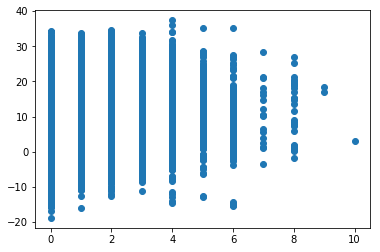

In [44]:
import matplotlib.pyplot as plt
plt.scatter(df_hot_encoded["Ff"], df_hot_encoded["T"])

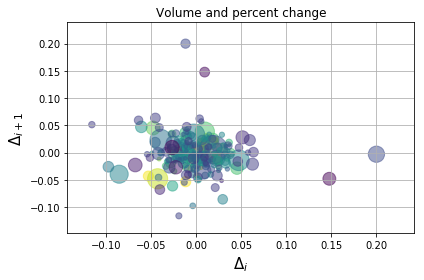

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

#### We got a couple of cols with corr above 20, 1 above 70

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalAveragePooling1D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [30]:
from sklearn.model_selection import train_test_split
features = df_hot_encoded.drop(["Ff"], axis=1)
label = df_hot_encoded["Ff"]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)

In [31]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=78, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])
    return model

In [32]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [33]:
# fix random seed for reproducibility
import numpy as np
seed = 7
np.random.seed(seed)

In [34]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [35]:
X_train.shape

(8813, 78)

In [36]:
y_train.shape

(8813,)

In [37]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [38]:
results

array([0.63718822, 0.62925171, 0.62131521, 0.67082862, 0.60953463,
       0.63223611, 0.60726449, 0.65834281, 0.65380251, 0.6367764 ])

In [40]:
print("Baseline: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 63.57% std: (1.96%)


In [39]:

# TODO: Remove empty string "" values as they are null as well


# TODO: Consider wind direction for Stef4o